In [153]:
import os
import pandas as pd
from datetime import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px


In [154]:
# Charger les fichiers CSV
def load_csv_files(csv_folder, sep=';'):
    dataframes = {}
    files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]
    for file in files:
        df_name = file.capitalize()
        df = pd.read_csv(os.path.join(csv_folder, file), sep=sep)
        dataframes[df_name] = df
    return dataframes

In [155]:
#extraction des données
data= load_csv_files('processed_data_for_data_viz')

df_absencerepas=data['Absencerepas.csv']
df_absenceseleves=data['Absenceseleves.csv']
df_appreciationduconseil=data['Appreciationduconseil.csv']
df_appreciationprofesseurs=data['Appreciationprofesseurs.csv']
df_notes_devoir=data['Df_notes_devoir.csv']
df_passagesinfirmerie=data['Passagesinfirmerie.csv']
df_punition=data['Punition.csv']
df_retards=data['Retards.csv']
df_sanction=data['Sanction.csv']
df_eleve=data['Eleve.csv']

1. **`df_absencerepas`**  
   Ce DataFrame contient des informations sur les absences des élèves durant les repas. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `date` : La date de l'absence.
   - `eleve_id` : Identifiant unique de l'élève.

2. **`df_absenceseleves`**  
   Ce DataFrame détaille les absences générales des élèves. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `motif` : Le motif de l'absence.
   - `date` : La date de l'absence.
   - `nb_demi_journee` : Nombre de demi-journées d'absence.
   - `eleve_id` : Identifiant unique de l'élève.

3. **`df_appreciationduconseil`**  
   Ce DataFrame présente les appréciations données par le conseil aux élèves. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `periode` : La période concernée (ex : trimestre).
   - `appr` : Commentaire d'appréciation par le conseil.
   - `eleve_id` : Identifiant unique de l'élève.

4. **`df_appreciationprofesseurs`**  
   Ce DataFrame regroupe les appréciations des professeurs pour chaque élève. Les colonnes incluent :
   - `matiere` : La matière concernée.
   - `classe` : La classe de l'élève.
   - `periode` : La période concernée.
   - `appr` : Commentaire d'appréciation par le professeur.
   - `eleve_id` : Identifiant unique de l'élève.
   - `prof_id` : Identifiant unique du professeur.

5. **`df_notes_devoir`**  
   Ce DataFrame contient les notes obtenues par les élèves pour différents devoirs. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `matiere` : La matière concernée.
   - `date` : La date du devoir.
   - `trimestre` : Trimestre concerné.
   - `sur` : Note maximale possible.
   - `coeff` : Coefficient de la note.
   - `note` : Note obtenue par l'élève.
   - `eleve_id` : Identifiant unique de l'élève.
   - `prof_id` : Identifiant unique du professeur.

6. **`df_passagesinfirmerie`**  
   Ce DataFrame liste les passages des élèves à l'infirmerie. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `heure` : Heure du passage.
   - `date` : La date du passage.
   - `duree` : Durée de la visite à l'infirmerie.
   - `eleve_id` : Identifiant unique de l'élève.

7. **`df_punition`**  
   Ce DataFrame détaille les punitions infligées aux élèves. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `punition` : Type de punition.
   - `date` : La date de la punition.
   - `motif` : Le motif de la punition.
   - `heure` : Heure de la punition.
   - `eleve_id` : Identifiant unique de l'élève.

8. **`df_retards`**  
   Ce DataFrame recense les retards des élèves. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `motif` : Le motif du retard.
   - `regle` : Règle enfreinte (si applicable).
   - `date` : La date du retard.
   - `heure` : Heure du retard.
   - `duree` : Durée du retard.
   - `eleve_id` : Identifiant unique de l'élève.

9. **`df_sanction`**  
   Ce DataFrame contient des informations sur les sanctions appliquées aux élèves. Les colonnes incluent :
   - `classes` : La classe de l'élève.
   - `date` : La date de la sanction.
   - `sanction` : Type de sanction.
   - `motif` : Le motif de la sanction.
   - `eleve_id` : Identifiant unique de l'élève.

10. **`df_Eleve`** 
  Ce DataFrame contient des informations sur les sanctions appliquées aux élèves. Les colonnes incluent :
    - `ident` : Identifiant unique de l'élève (correspondant à eleve_id dans les autres fichiers).
    - `date_naiss` : Date de naissance de l'élève.
    - `classes` : Classe de l'élève.
    - `sexe` : Sexe de l'élève (M/F).


---

### Axe 1 : Mieux comprendre les élèves et leur profil

1. **Profil de l'élève basé sur les résultats académiques, le comportement et le sexe** :
   - Création de groupes d'élèves selon les performances, les retards, les absences, les punitions, les passages à l'infirmerie, et le sexe, pour détecter des profils d'élèves à risque en fonction de critères variés.

2. **Impact des absences et des retards sur les résultats, avec une analyse par genre** :
   - Analyse de corrélation entre les absences, les retards et les moyennes, en examinant les différences potentielles entre les genres.

3. **Évolution des résultats par trimestre et par genre** :
   - Étudier la progression des notes pour chaque élève et par genre, afin d’identifier des différences dans les dynamiques d’apprentissage et d’évolution des élèves.

4. **Analyse des appréciations pour déceler les compétences clés, les axes d’amélioration et les différences par genre** :
   - Scorer les appréciations pour voir si des différences de ton ou de contenu sont présentes selon le sexe des élèves, notamment dans les mentions de participation, de comportement, ou d'efforts.

5. **Répartition des notes par matière, par classe et par genre** :
   - Visualiser les moyennes et les écarts-types par matière, classe, et sexe pour voir si certains groupes (filles ou garçons) rencontrent des difficultés spécifiques.

6. **Profil comportemental des élèves par genre** :
   - Analyser les tendances comportementales (punitions, sanctions, retards) pour détecter des différences entre les genres, ce qui pourrait aider à adapter les interventions pédagogiques.

---

### Axe 2 : Mieux comprendre les pratiques pédagogiques

1. **Analyse de la variabilité des notes par professeur, par classe et par genre** :
   - Identifier des écarts de notation entre les professeurs pour une même matière ou entre les classes, en ajoutant une analyse par genre pour évaluer la cohérence des pratiques d’évaluation et repérer de possibles biais.

2. **Effet du coefficient des devoirs sur les moyennes, différencié par genre** :
   - Étudier l'impact des devoirs à fort coefficient sur les moyennes des élèves, avec une analyse par genre pour identifier si certains devoirs influencent différemment les résultats des filles et des garçons.

3. **Temps de retour des devoirs par professeur, en tenant compte du genre** :
   - Calculer le temps moyen de correction des devoirs et vérifier s'il existe des variations dans le traitement des copies en fonction du sexe des élèves.

4. **Scoring des appréciations pour évaluer l'encouragement ou la critique, et analyse par genre** :
   - Évaluer les différences de ton des appréciations (positif, neutre, négatif) selon le sexe, pour voir si certaines tendances se dégagent en fonction du genre.

5. **Fréquence des appréciations positives vs négatives par matière et par genre** :
   - Analyse des tendances des appréciations par matière et par genre, ce qui peut révéler des matières où un groupe se sent plus valorisé ou, au contraire, plus critiqué.

6. **Analyse de l'efficacité des stratégies pédagogiques par genre** :
   - Croiser les progrès des élèves avec les appréciations pour repérer des stratégies pédagogiques efficaces, en vérifiant si ces stratégies fonctionnent différemment pour les filles et les garçons.

7. **Répartition des devoirs et des évaluations sur l’année, avec une analyse par genre** :
   - Visualiser les devoirs et évaluations par période et par genre pour identifier des éventuelles différences dans la charge de travail, et adapter la planification pour éviter des pics de stress pour certains groupes.

---


In [156]:
df_notes_devoir

,classes,matiere,date,trimestre,sur,coeff,note,eleve_id,prof_id
0,1A,FRANÇAIS,2023-09-21,Trimestre 1,20,1.0,13.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,0-qkoCBCeu1-A2WvQZEecuK98nvosoTdzUTdiI6lwDo
1,1A,ENSEIGNEMENT SCIENTIFIQUE (PC),2023-09-25,Trimestre 1,20,0.5,7.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,zalvxQljlC_iyENJQK4qClMhXqp3ZogCFPq9JR9Yalw
2,1A,SPE MATHS,2023-09-26,Trimestre 1,20,1.0,8.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,JumFXm1J2Jm1zAFbJ-KKVcMFxl2mfiu882gBggAozMg
3,1A,HISTOIRE GEOGRAPHIE,2023-09-27,Trimestre 1,10,1.0,5.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,MkTDEy0fzub_lzFNRBxLLG0sLd5mzSpMxX3wx8l6Guo
4,1A,ARABE LVA,2023-10-04,Trimestre 1,20,2.0,12.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,t8jRAdLt_P0Ai2D2pyBamlLBFMnN_k9Od6ycTUB98oA
...,...,...,...,...,...,...,...,...,...
23142,Terminale,SPE HGGSP,2024-05-18,Trimestre 3,20,2.0,16.5,D-H5a7Qp9mw-1fNMLUSnF6gBBuMEndddzmZ7asqOU10,NaTUeIaRZA9cPVkJaVYXHesRe7jqnQ2GpN6t1ycqJz8
23143,Terminale,SPE HGGSP,2024-05-20,Trimestre 3,20,2.0,15.0,D-H5a7Qp9mw-1fNMLUSnF6gBBuMEndddzmZ7asqOU10,NaTUeIaRZA9cPVkJaVYXHesRe7jqnQ2GpN6t1ycqJz8
23144,Terminale,ARABE BFI (CDM),2024-05-20,Trimestre 3,20,2.0,14.0,D-H5a7Qp9mw-1fNMLUSnF6gBBuMEndddzmZ7asqOU10,t8jRAdLt_P0Ai2D2pyBamlLBFMnN_k9Od6ycTUB98oA
23145,Terminale,ARABE BFI (CDM),2024-05-20,Trimestre 3,20,2.0,16.0,D-H5a7Qp9mw-1fNMLUSnF6gBBuMEndddzmZ7asqOU10,t8jRAdLt_P0Ai2D2pyBamlLBFMnN_k9Od6ycTUB98oA


## Profilage des eleves


In [157]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Renommer la colonne `ident` dans df_eleve pour correspondre à `eleve_id`
df_eleve.rename(columns={'ident': 'eleve_id'}, inplace=True)

# Calcul de la moyenne annuelle des notes par élève
# Calcul de la note pondérée en normalisant sur 20 et appliquant le coefficient
df_notes_devoir['note_ponderee'] = (df_notes_devoir['note'] / df_notes_devoir['sur']) * 20 * df_notes_devoir['coeff']

# Calcul de la moyenne annuelle pondérée pour chaque élève
notes_annuelles = df_notes_devoir.groupby('eleve_id').apply(
    lambda x: x['note_ponderee'].sum() / x['coeff'].sum()
).reset_index(name='moyenne_annuelle')

notes_annuelles.columns = ['eleve_id', 'moyenne_annuelle']

# Nombre total d'absences, retards, punitions, passages à l'infirmerie
absences_total = df_absenceseleves.groupby('eleve_id').size().reset_index(name='total_absences')
retards_total = df_retards.groupby('eleve_id').size().reset_index(name='total_retards')
punitions_total = df_punition.groupby('eleve_id').size().reset_index(name='total_punitions')
infirmerie_total = df_passagesinfirmerie.groupby('eleve_id').size().reset_index(name='total_passages_infirmerie')

# Fusionner tous les indicateurs dans un DataFrame unique avec `sexe`
indicateurs_eleves = notes_annuelles.merge(absences_total, on='eleve_id', how='left') \
                             .merge(retards_total, on='eleve_id', how='left') \
                             .merge(punitions_total, on='eleve_id', how='left') \
                             .merge(infirmerie_total, on='eleve_id', how='left') \
                             .merge(df_eleve[['eleve_id', 'sexe']], on='eleve_id', how='left')

# Encoder la variable `sexe` : 0 pour "F" (filles) et 1 pour "M" (garçons)
indicateurs_eleves['sexe'] = indicateurs_eleves['sexe'].map({'F': 0, 'M': 1})

# Remplir les valeurs manquantes par 0
indicateurs_eleves.fillna(0, inplace=True)

# Normalisation des indicateurs, incluant la variable `sexe`
scaler = StandardScaler()
indicateurs_normalises = scaler.fit_transform(indicateurs_eleves[['moyenne_annuelle', 'total_absences',
                                                           'total_retards', 'total_punitions',
                                                           'total_passages_infirmerie', 'sexe']])

# Appliquer le clustering K-means avec la variable `sexe` incluse
kmeans = KMeans(n_clusters=4, random_state=0)
indicateurs_eleves['cluster'] = kmeans.fit_predict(indicateurs_normalises)

# Afficher les moyennes par cluster pour observer les tendances, y compris l'impact du sexe
profil_counts = indicateurs_eleves.groupby('cluster').mean()

profil_counts


/Users/mathieubartozzi/.pyenv/versions/3.10.6/envs/projets_osui/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,moyenne_annuelle,total_absences,total_retards,total_punitions,total_passages_infirmerie,sexe
cluster,,,,,,
0,14.266494,13.427273,4.500000,2.336364,2.281818,1.000000
1,12.010724,31.946237,19.903226,10.064516,4.236559,0.537634
2,15.144712,13.426136,5.539773,1.011364,2.920455,0.000000
3,12.460574,19.250000,6.500000,5.250000,108.000000,0.250000


### Répartition des élèves par profil basé sur la moyenne, l'assiduité, le comportement, les passages à l'infirmerie et le genre. 

In [158]:
# Calcul des pourcentages d'élèves dans chaque profil
profil_counts = indicateurs_eleves['cluster'].value_counts(normalize=True) * 100
profil_counts.rename("Pourcentage d'élèves (%)", inplace=True)

# Création du graphique en camembert avec Plotly pour les pourcentages d'élèves par profil (numérotation commencée à 1)
import plotly.express as px

fig = px.pie(
    names=[f"Profil {i + 1}" for i in profil_counts.index],  # Remplacement de "Cluster" par "Profil" et commencement à 1
    values=profil_counts,
    title="Répartition des élèves par profil",
    hole=0.3
)

# Affichage du graphique
fig.show()
indicateurs_eleves.drop('cluster',axis='columns',inplace=True)


In [159]:
profil_counts.to_csv('streamlit/data_app/profil_counts.csv', index_label="Profil", header=["Pourcentage d'élèves (%)"])

### Description des Profils

- **Profil 1** :  
  Ce groupe représente des **élèves avec des difficultés scolaires importantes**, ayant une moyenne annuelle de **11,50** et un taux d'absentéisme très élevé (**50,47**). Ils ont un nombre modéré de retards (**12,35**) et peu de punitions (**2,86**), ainsi que des passages à l'infirmerie faibles (**2,10**). Ces élèves sont majoritairement des filles (environ 73 %). Ce profil pourrait indiquer des élèves faisant face à des situations personnels ou familiales particulières. 

- **Profil 2** :  
  Les élèves de ce profil ont des **résultats modérément bons** avec une moyenne annuelle de **14,30** mais présentent un nombre très élevé de retards (**23,04**) et de punitions (**15,40**). Le nombre d'absences est modéré (**14,82**) et les passages à l'infirmerie sont également modérés (**5,30**). Ce profil est majoritairement composé de garçons (environ 68 %), ce qui suggère des **difficultés comportementales** et un besoin de soutien pour améliorer leur discipline et assiduité.

- **Profil 3** :  
  Ce profil regroupe des **élèves performants scolairement** avec une moyenne annuelle élevée de **15,68** et peu d'absences (**11,95**), de retards (**5,24**), ou de punitions (**1,03**). Les passages à l'infirmerie sont également faibles (**2,93**). Ce groupe est exclusivement composé de filles. Ce profil semble stable et autonome.

- **Profil 4** :  
  Les élèves de ce groupe présentent également des **résultats scolaires faibles** avec une moyenne annuelle de **12,43**, mais se démarquent par un nombre extrêmement élevé de passages à l'infirmerie (**108**). Leurs absences sont modérées (**19,25**) ainsi que leurs retards (**6,50**) et punitions (**5,25**). Ce groupe est principalement composé de filles (environ 75 %). 

- **Profil 5** :  
  Ce groupe représente des **garçons ayant de bonnes performances scolaires**, avec une moyenne annuelle de **14,54**. Ils ont peu d'absences (**13,75**), de retards (**4,74**), de punitions (**2,02**), et de passages à l'infirmerie (**2,39**). Ce profil semble stable et autonome.

---


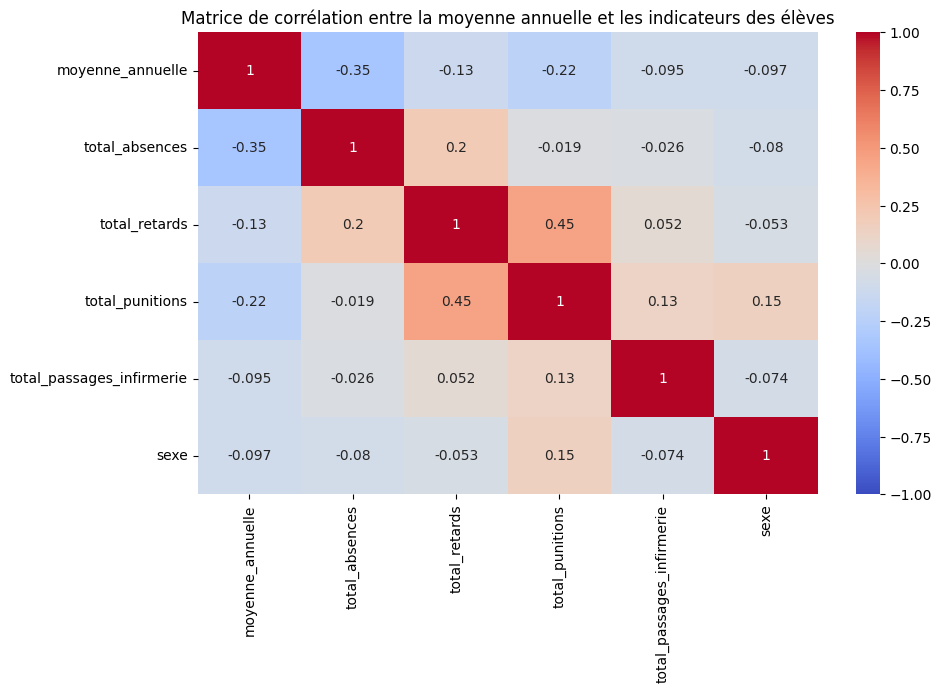

In [160]:
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = indicateurs_eleves[['moyenne_annuelle', 'total_absences', 'total_retards', 'total_punitions', 'total_passages_infirmerie', 'sexe']].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre la moyenne annuelle et les indicateurs des élèves")
plt.show()

In [161]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Création des sous-plots avec 2 lignes et 3 colonnes
fig = make_subplots(rows=2, cols=3, subplot_titles=[
    "Moyenne vs Absences",
    "Moyenne vs Retards",
    "Moyenne vs Punitions",
    "Absences vs Retards",
    "Absences vs Punitions",
    "Retards vs Punitions"
])

# Moyenne annuelle vs Absences
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_absences'],
    y=indicateurs_eleves['moyenne_annuelle'],
    mode='markers',
    name="Moyenne vs Absences"
), row=1, col=1)

# Moyenne annuelle vs Retards
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_retards'],
    y=indicateurs_eleves['moyenne_annuelle'],
    mode='markers',
    name="Moyenne vs Retards"
), row=1, col=2)

# Moyenne annuelle vs Punitions
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_punitions'],
    y=indicateurs_eleves['moyenne_annuelle'],
    mode='markers',
    name="Moyenne vs Punitions"
), row=1, col=3)

# Absences vs Retards
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_absences'],
    y=indicateurs_eleves['total_retards'],
    mode='markers',
    name="Absences vs Retards"
), row=2, col=1)

# Absences vs Punitions
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_absences'],
    y=indicateurs_eleves['total_punitions'],
    mode='markers',
    name="Absences vs Punitions"
), row=2, col=2)

# Retards vs Punitions
fig.add_trace(go.Scatter(
    x=indicateurs_eleves['total_retards'],
    y=indicateurs_eleves['total_punitions'],
    mode='markers',
    name="Retards vs Punitions"
), row=2, col=3)

# Mise en forme du layout
fig.update_layout(height=600, width=900, title_text="Analyse des indicateurs - Tous les élèves")

# Affichage du graphique
fig.show()


In [162]:
# Création du dictionnaire de mapping
mapping_matiere = {
    'FRANÇAIS': 'Français',
    'ENSEIGNEMENT SCIENTIFIQUE (PC)': 'SPC',
    'SPE MATHS': 'Mathématiques',
    'HISTOIRE GEOGRAPHIE': 'Hist-Géo/EMC',
    'ARABE LVA': 'Arabe',
    'SPE PC': 'SPC',
    'SPE SVT': 'SVT',
    'ANGLAIS LVB': 'Anglais',
    'Éducation physique et sportive': 'EPS',
    'ENSEIGNEMENT SCIENTIFIQUE (SVT)': 'SVT',
    'EMC': 'Hist-Géo/EMC',
    'ESPAGNOL': 'Espagnol',
    'APPROFONDISSEMENT CULTUREL ET LINGUISTIQUE': 'Anglais',
    'HISTOIRE GEOGRAPHIE EN ARABE': 'HG Arabe',
    'ARABE BFI (CDM)': 'Arabe',
    'ANGLAIS LVB BFI (ACL)': 'Anglais',
    'SPE HGGSP': 'Hist-Géo/EMC',
    'SPE SES': 'SES',
    'MATHS TRONC COMMUN': 'Mathématiques',
    'MATHEMATIQUES': 'Mathématiques',
    'SPC': 'SPC',
    'SES': 'SES',
    'SVT': 'SVT',
    'SNT': 'SNT',
    'ARABE SI': 'Arabe',
    'HIST GEO NA': 'Hist-Géo/EMC',
    'PHILOSOPHIE': 'Philosophie',
    'MATHS EXPERTES': 'Mathématiques',
    'ARABE LV SECTION': 'Arabe',
    'MATHS COMPLEMENTAIRES': 'Mathématiques'
}

df_notes_devoir['matiere'] = df_notes_devoir['matiere'].map(mapping_matiere)

df_notes_devoir = df_notes_devoir.merge(df_eleve[['eleve_id', 'sexe']], on='eleve_id', how='left')


In [163]:
df_notes_devoir.head(3)

,classes,matiere,date,trimestre,sur,coeff,note,eleve_id,prof_id,note_ponderee,sexe
0,1A,Français,2023-09-21,Trimestre 1,20,1.0,13.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,0-qkoCBCeu1-A2WvQZEecuK98nvosoTdzUTdiI6lwDo,13.0,M
1,1A,SPC,2023-09-25,Trimestre 1,20,0.5,7.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,zalvxQljlC_iyENJQK4qClMhXqp3ZogCFPq9JR9Yalw,3.5,M
2,1A,Mathématiques,2023-09-26,Trimestre 1,20,1.0,8.0,x98XOvwoNyehe5aGZFC4QGm8ZPyM6Sof0LJwXpfNP-c,JumFXm1J2Jm1zAFbJ-KKVcMFxl2mfiu882gBggAozMg,8.0,M


In [165]:
print(df_notes_devoir.columns)


Index(['classes', 'matiere', 'date', 'trimestre', 'sur', 'coeff', 'note',
       'eleve_id', 'prof_id', 'note_ponderee', 'sexe'],
      dtype='object')


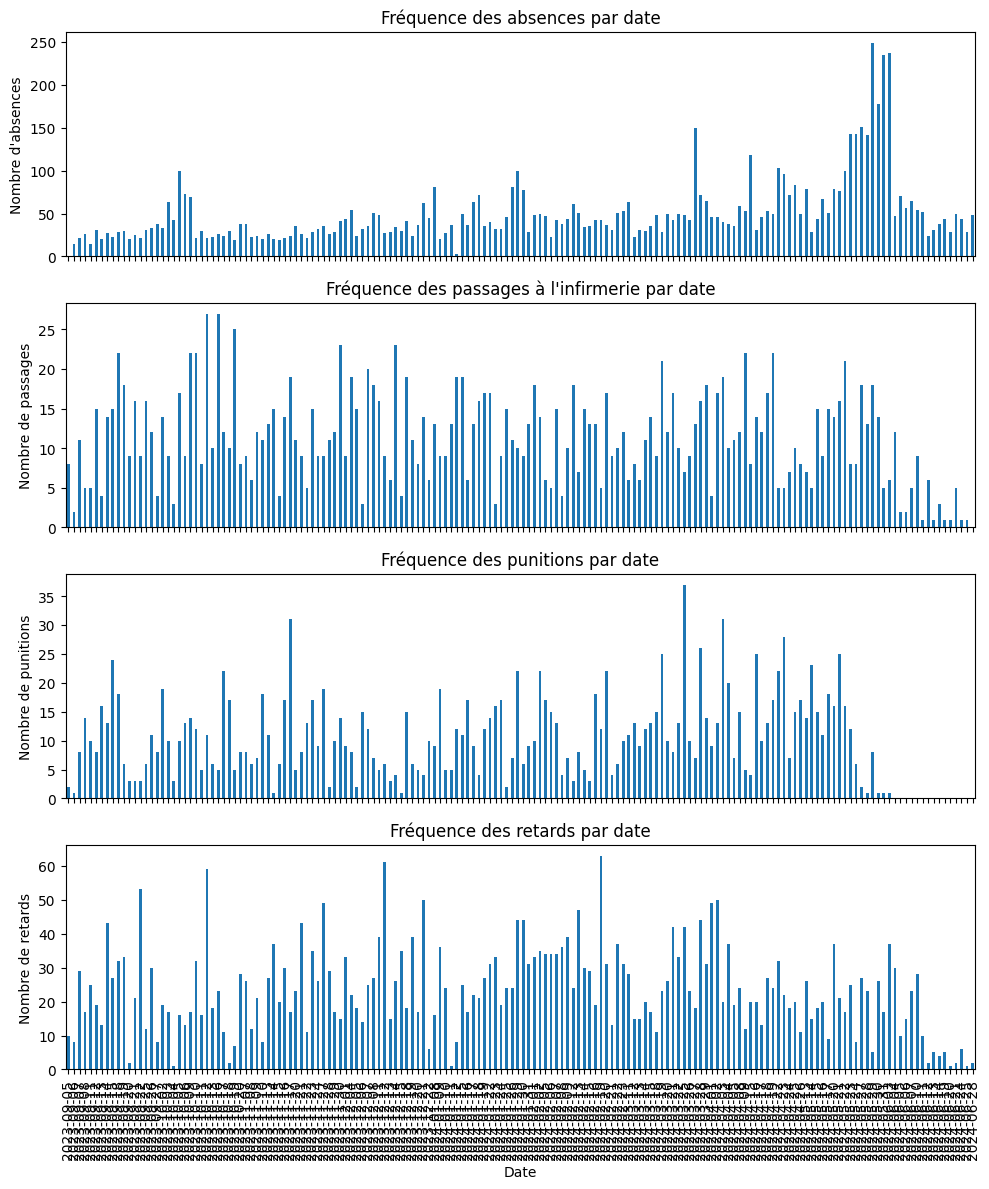

In [166]:
# Counting occurrences by date
absences_by_date = df_absenceseleves['date'].value_counts().sort_index()
infirmerie_by_date = df_passagesinfirmerie['date'].value_counts().sort_index()
punition_by_date = df_punition['date'].value_counts().sort_index()
retards_by_date = df_retards['date'].value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

absences_by_date.plot(kind='bar', ax=axes[0])
axes[0].set_title('Fréquence des absences par date')
axes[0].set_ylabel('Nombre d\'absences')

infirmerie_by_date.plot(kind='bar', ax=axes[1])
axes[1].set_title('Fréquence des passages à l\'infirmerie par date')
axes[1].set_ylabel('Nombre de passages')

punition_by_date.plot(kind='bar', ax=axes[2])
axes[2].set_title('Fréquence des punitions par date')
axes[2].set_ylabel('Nombre de punitions')

retards_by_date.plot(kind='bar', ax=axes[3])
axes[3].set_title('Fréquence des retards par date')
axes[3].set_ylabel('Nombre de retards')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [168]:
import plotly.subplots as sp

# Counting occurrences by date
absences_by_date = df_absenceseleves['date'].value_counts().sort_index()
infirmerie_by_date = df_passagesinfirmerie['date'].value_counts().sort_index()
punition_by_date = df_punition['date'].value_counts().sort_index()
retards_by_date = df_retards['date'].value_counts().sort_index()

# Create subplots for each event type, displayed vertically
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=(
    "Fréquence des absences par date",
    "Fréquence des passages à l'infirmerie par date",
    "Fréquence des punitions par date",
    "Fréquence des retards par date"
))

# Absences
fig.add_trace(go.Bar(
    x=absences_by_date.index,
    y=absences_by_date.values,
    name="Absences",
    marker_color='blue'
), row=1, col=1)

# Passages à l'infirmerie
fig.add_trace(go.Bar(
    x=infirmerie_by_date.index,
    y=infirmerie_by_date.values,
    name="Passages à l'infirmerie",
    marker_color='green'
), row=2, col=1)

# Punitions
fig.add_trace(go.Bar(
    x=punition_by_date.index,
    y=punition_by_date.values,
    name="Punitions",
    marker_color='red'
), row=3, col=1)

# Retards
fig.add_trace(go.Bar(
    x=retards_by_date.index,
    y=retards_by_date.values,
    name="Retards",
    marker_color='purple'
), row=4, col=1)

# Update layout
fig.update_layout(
    height=800,
    title="Fréquence des événements par date",
    showlegend=False,
    template='plotly_white'
)

# Set x-axis title on the last subplot only
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Nombre d'événements", row=1, col=1)
fig.update_yaxes(title_text="Nombre d'événements", row=2, col=1)
fig.update_yaxes(title_text="Nombre d'événements", row=3, col=1)
fig.update_yaxes(title_text="Nombre d'événements", row=4, col=1)

fig.show()
